# Esercizio 12.1
L'esercizio richiede di utilizzare una rete $DNN$ addestrata per riconoscere dei numeri da $1$ a $10$ in scala di grigi scritti a mano. L'obbiettivo è confrontare l'accuracy e la loss di diversi optimizers.

0
1
2
3
4
5


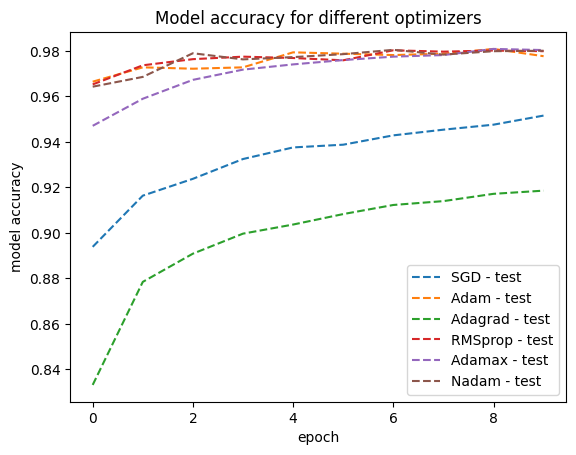

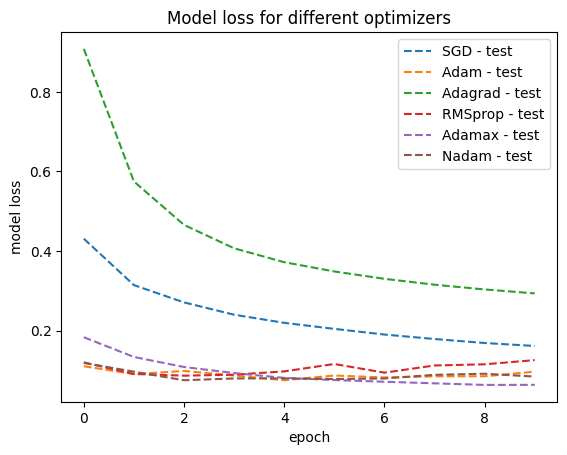

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adam, Adamax, Nadam

# imposto i seed per replicabilità dei dati
seed=0
np.random.seed(seed)
tf.random.set_seed(seed)

#lista di optimizers
optimizers = [SGD(), Adam(), Adagrad(), RMSprop(), Adamax(), Nadam()]
optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]

#dimensioni dell'immagine di input
img_rows, img_cols = 28, 28 # numero di pixel
# output
num_classes = 10 # 10 digits

#dati di validazione e allenamento
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# cambio la forma dei dati per adattarla alla rete DNN. "Stendo" l'immagine riga per riga
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# normalizzo i valori tra [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
#ogni input diventa quindi una sequenza piatta di 784 valori di pixel normalizzati

#trasforma i numeri interi delle etichette in vettori binari (one-hot)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

def create_DNN():
    # inizializzo il modello
    model = Sequential()
    # primo hidden layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # secondo hidden layer
    model.add(Dense(100, activation='relu'))
    # applico dropout del 50%
    model.add(Dropout(0.5))
    # output layer con softmax. Softmax trasforma i valori grezzi in probabilità
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

#compilazione del modello
def compile_model(opt_suffix):
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy,#la loss è la crossentropy, adatta a problemi di classificazione
                  optimizer=opt_suffix,
                  metrics=['acc'])
    return model


# parametri di addestramento
batch_size = 64
epochs = 10

# Per salvare gli history
histories = {}

for i in range(6):
    print(i)
    # creo la rete neurale con optimizer differenti
    model_DNN = compile_model(optimizers[i])


    # addestramento dei DNN
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    
    #salvo gli history
    histories[optimizer_names[i]] = history


# plotto l'accuracy di ogni optimizer sui validation data
plt.figure()
for name in optimizer_names:
    plt.plot(histories[name].history['val_acc'], linestyle='--', label=f'{name} - test')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model accuracy for different optimizers")
plt.show()

plt.clf()

# plotto la loss di ogni optimizer sui training data
for name in optimizer_names:
    plt.plot(histories[name].history['val_loss'], linestyle='--', label=f'{name} - test')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model loss for different optimizers")
plt.show()

## Commento
La reten neurale utilizzata è di tipo $DNN$.

Tutti e $6$ gli optimizers all'aumentare delle epoche diminuiscono la loss e migliorano l'accuracy, tuttavia ognuno di questi ha performance diverse. Il peggiore risulta essere $adadelta$, non plottato nei grafici a causa della lenta diminuzione della loss e del lento aumento dell'accuracy che causano una lettura peggiore delle performance degli altri optimizers.

$Adagrad$ e $sgd$ seguono con performance migliori di $adadelta$ ma inferiori agli altri $4$ optimizers che hanno un andamento pressocchè simile. Questi sono $adam$, $nadam$, $adamax$, e $RMSprop$. 
Questo suggerisce una migliore capacità di adattamento ai dati e una maggiore robustezza nell’aggiornamento dei pesi, grazie ai meccanismi di adattamento del learning rate e di momentum che integrano.

Tra questi, non si notano differenze significative in termini di performance, ma si può osservare che $Nadam$ tende a stabilizzare leggermente meglio la curva di accuracy in validazione, probabilmente grazie al suo uso del Nesterov momentum, che anticipa l’aggiornamento e aiuta a evitare oscillazioni.

In generale, si evidenzia come gli optimizer adattativi ($Adam, Nadam, RMSprop, Adamax$) siano più efficaci e veloci nel far apprendere la rete rispetto agli optimizer più semplici come $SGD$ e $Adagrad$, specialmente in problemi complessi come il riconoscimento di immagini con $DNN$. Più l'optimizer è "intelligente", meglio impara la rete.

Infine, l’analisi delle curve di loss e accuracy indica che non si è osservato un evidente overfitting nei modelli con optimizer adattativi, grazie anche a un’adeguata scelta del numero di epoche e all’uso della validazione.

# Esercizio 12.2
L'esercizio richiede di utilizzare una rete $CNN$ addestrata per riconoscere dei numeri da $1$ a $10$ in scala di grigi scritti a mano. L'obbiettivo è confrontare l'accuracy e la loss di diversi optimizers.

0


C:\Users\Lorenzo\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1
2
3
4
5


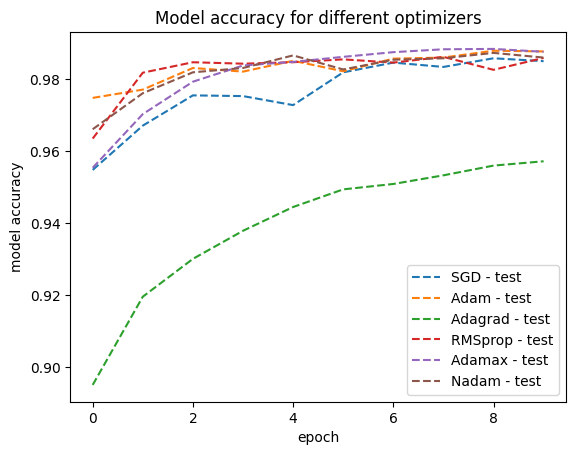

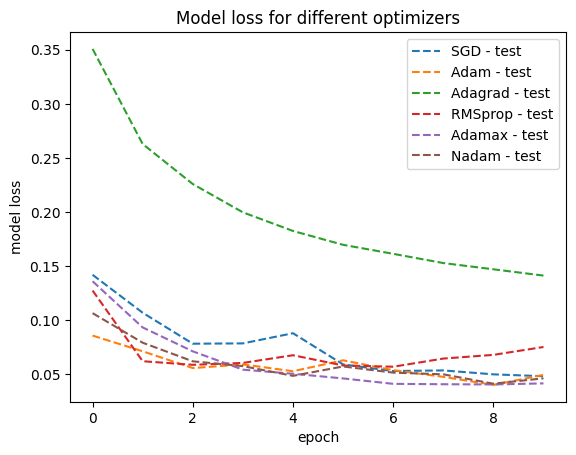

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adam, Adamax, Nadam
from keras.layers import Flatten, Conv2D, MaxPooling2D

#imposto i seed per la replicabilità
seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

#lista di optimizers
optimizers = [SGD(), Adam(), Adagrad(), RMSprop(), Adamax(), Nadam()]
optimizer_names = ["SGD", "Adam", "Adagrad", "RMSprop", "Adamax", "Nadam"]

#dimensioni dell'immagine di input
img_rows, img_cols = 28, 28 # numero di pixels 
# output
num_classes = 10 # 10 digits

#dati di validazione e allenamento
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#cambio la forma dei dati di input da (60000,28,28) a (60000,28,28,1), CNN vuole infatti il numero di canali, in questo caso 1(l'immagine è in scala di grigi)
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#trasforma i numeri interi delle etichette in vettori binari (one-hot)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

def create_CNN():
    # inizializzo il modello
    model = Sequential()
    # primo convutional layer con 10 filtri 5X5
    model.add(Conv2D(10, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #primo output 24X24X10
    model.add(MaxPooling2D(pool_size=(2, 2)))#riduce ogni dimensione spaziale di 2
    #secondo output 12X12X10

    #secondo convutional layer con 20 filtri 5X5 
    model.add(Conv2D(20, kernel_size=(5, 5),
                     activation='relu'))
    #terzo output 8X8X20  
    model.add(MaxPooling2D(pool_size=(2, 2)))#riduce ogni dimensione spaziale di 2
    #quarto output 4X4X20

    #aggiunta layer DNN
    model.add(Flatten())  # da (4,4,20) a vettore di dimensione 4*4*20=320

    #primo layer DNN
    model.add(Dense(4*4*20, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    #secondo layer DNN
    model.add(Dense(160, activation='relu'))
    #output layer con softmax. Softmax trasforma i valori grezzi in probabilità
    model.add(Dense(num_classes, activation='softmax'))

    return model
 
    
#compilazione del modello
def compile_model(opt_suffix):
    model=create_CNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt_suffix,
                  metrics=['acc'])
    return model

# parametri di addestramento
batch_size = 64
epochs = 10

# Per salvare gli history
histories = {}

for i in range(6):
    print(i)
    # creo la rete neurale con optimizer differenti
    model_CNN = compile_model(optimizers[i])

    # addestramento dei DNN
    history = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    
    #salvo gli history
    histories[optimizer_names[i]] = history


# plotto l'accuracy di ogni optimizer sui validation data
plt.figure()
for name in optimizer_names:
    plt.plot(histories[name].history['val_acc'], linestyle='--', label=f'{name} - test')
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model accuracy for different optimizers")
plt.show()

plt.clf()

# plotto la loss di ogni optimizer sui training data
for name in optimizer_names:
    plt.plot(histories[name].history['val_loss'], linestyle='--', label=f'{name} - test')
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.title("Model loss for different optimizers")
plt.show()

## Commento
Gli andamenti della loss e dell'accuracy per i vari optimizers sono gli stessi osservati nell'*esercizio 12.1*. 

Si osserva, a parità di epoche, una loss e un'accuracy migliore per ogni optimizer rispetto alla rete DNN. Questo perchè la CNN grazie a layer convoluzionali e di pooling riesce a catturare pattern locali e preservarli più efficacemente rispetto alla DNN. Vede l'immagine in modo più sofisticato e "intelligente". La DNN invece tratta l’immagine come un lungo vettore, senza considerare la posizione o la struttura dei pixel.

## Rete CNN
La rete CNN implementata ha la seguente struttura:

- Input: immagini con dimensione specificata da input_shape.

- Primo blocco convoluzionale:
Un layer $Conv2D$ con $10$ filtri di dimensione $5x5$ e funzione di attivazione $ReLU$, che estrae le prime caratteristiche dall’immagine. Dimensioni dell'output $24x24x10$.

- Layer di $MaxPooling2D$ con finestra $2x2$, che riduce le dimensioni spaziali dell’output da $24x24$ a $12x12x10$, mantenendo i 10 filtri.

- Secondo blocco convoluzionale:
Un altro layer $Conv2D$ con $20$ filtri $5x5$ e attivazione $ReLU$. Il numero di filtri è maggiore perchè cattura caratteristiche più complesse e di livello superiore. Dimensioni dell'output $8x8x20$.

- Layer di $MaxPooling2D$ $2x2$, che riduce le dimensioni spaziali da $8x8x20$ a $4x4x20$, mantenendo i $20$ canali.

- Flatten:
La mappa di feature 3D ($4x4x20$) viene appiattita in un vettore monodimensionale di dimensione $320$, pronto per essere passato ai layer completamente connessi.

- Primo layer DNN:
Un layer denso con $320$ neuroni, con attivazione $ReLU$, che impara combinazioni non lineari delle feature estratte.

- Layer di Dropout con probabilità 0.5 per ridurre l’overfitting.

- Secondo layer DNN:
Un altro layer denso con $160$ neuroni e attivazione $ReLU$, che approfondisce ulteriormente la rappresentazione interna.

- Output layer:
Un layer denso con $num classes = 10$ neuroni e funzione di attivazione $softmax$, che restituisce le probabilità predette per ciascuna classe.

# Esercizio 12.3
L'esercizio richiede di testare la CNN con 10 nuove immagini e verificare la bontà delle sue predizioni.

Test accuracy: 87.49%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


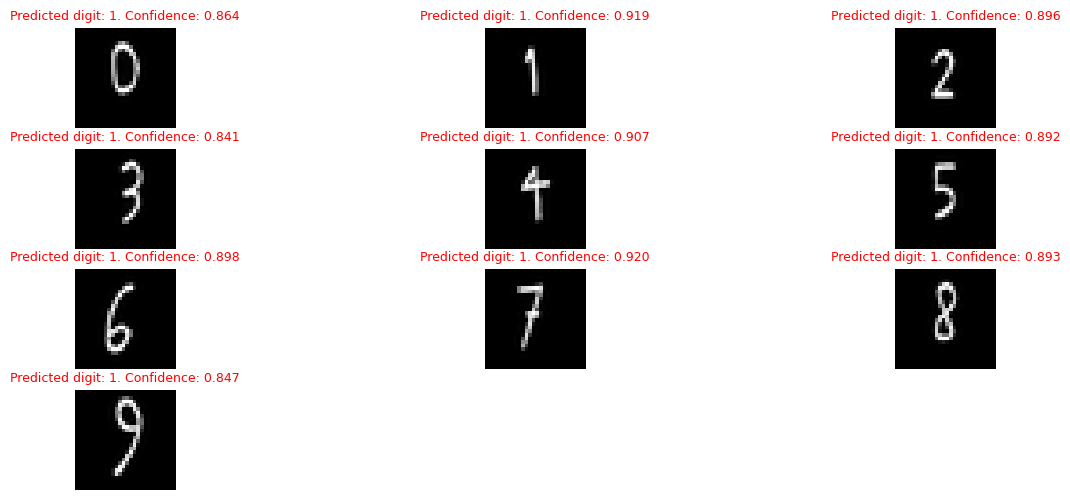

In [9]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.layers import Flatten, Conv2D, MaxPooling2D
from PIL import Image, ImageEnhance, ImageOps #librerie per rendere le immagini più simili possibili a quelle di training


#imposto i seed per la replicabilità
seed=0
np.random.seed(seed) 
tf.random.set_seed(seed)

#dimensioni dell'immagine di input
img_rows, img_cols = 28, 28 # numero di pixels 
# output
num_classes = 10 # 10 digits

#dati di validazione e allenamento
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#cambio la forma dei dati di input da (60000,28,28) a (60000,28,28,1), CNN vuole infatti il numero di canali, in questo caso 1(l'immagine è in scala di grigi)
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#trasforma i numeri interi delle etichette in vettori binari (one-hot)
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

def create_CNN():
    # inizializzo il modello
    model = Sequential()
    # primo convutional layer con 10 filtri 5X5
    model.add(Conv2D(20, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=input_shape))
    #primo output 24X24X10
    model.add(MaxPooling2D(pool_size=(2, 2)))#riduce ogni dimensione spaziale di 2
    #secondo output 12X12X10
    model.add(Dropout(0.25))

    #secondo convutional layer con 20 filtri 5X5 
    model.add(Conv2D(35, kernel_size=(5, 5),
                     activation='relu'))
    #terzo output 8X8X20  
    model.add(MaxPooling2D(pool_size=(2, 2)))#riduce ogni dimensione spaziale di 2
    #quarto output 4X4X20
    model.add(Dropout(0.25))

    #aggiunta layer DNN
    model.add(Flatten())  # da (4,4,20) a vettore di dimensione 4*4*20=320

    #primo layer DNN
    model.add(Dense(4*4*20, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    #secondo layer DNN
    model.add(Dense(160, activation='relu'))
    #output layer con softmax. Softmax trasforma i valori grezzi in probabilità
    model.add(Dense(num_classes, activation='softmax'))

    return model
 
    
#compilazione del modello
def compile_model():
    model=create_CNN()
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    return model

# parametri di addestramento
batch_size = 64
epochs = 10

# creo la rete neurale 
model_CNN = compile_model()

# addestramento dei DNN
history = model_CNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))

#valutazione della rete
score = model_CNN.evaluate(X_test, Y_test, verbose=0)
print(f"Test accuracy: {score[1]*100:.2f}%")

plt.figure(figsize=(15, 6))  # Imposto dimensione della figura

#carico le immagini e valuto la predizione della rete neurale su di esse
for i in range(0,10):
    digit_filename = f"pictures/{i}.png"
    
    # Carico immagine in scala di grigi
    digit_in = Image.open(digit_filename).convert('L')

    # Resize a 28x28
    digit_in = digit_in.resize((28, 28), Image.LANCZOS)

    # Converto in array e normalizza tra 0 e 1
    data = np.array(digit_in).astype(np.float32) / 255.0

    # Inverto colori solo se serve (se sfondo è chiaro)
    if np.mean(data) > 0.5:
        data = 1.0 - data

    # Reshape per input nel modello
    input_data = data.reshape(1, 28, 28, 1)

    # Predizione
    prediction = model_CNN.predict(input_data)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)
    
    # Visualizzo immagine con digit predetto sopra e confidenza
    plt.subplot(4, 3, i + 1)
    plt.imshow(data, cmap='gray')
    plt.title(f'Predicted digit: {predicted_class}. Confidence: {confidence:.3f}', fontsize=9, color='red')
    plt.axis('off')
    
plt.show()

## Risultati e analisi
L'accuracy è elevata ma la CNN non riesce a predire la cifra nell'immagine. La bassa e conforme confidenza di ogni predizione, segno che la rete è incerta e non “riconosce” davvero le cifre, porta a concludere che la rete neurale non è in grado di effettuare previsioni corrette o sensate sulle immagini disegnate a mano. Il risultato non cambia anche se viene modificato l'optimizer o il numero di epoche o la complessità della rete.

Le difficoltà della CNN nel riconoscere le cifre scritte a mano nascono dal fatto che la rete è stata addestrata su immagini del dataset MNIST, che sono pulite, centrate, ben contrastate e normalizzate.
Al contrario, le cifre disegnate a mano (e importate tramite immagini esterne) risultano spesso più rumorose, sfocate e decentrate, rendendo la predizione più difficile.

Una possibile soluzione consiste nel'introdurre rumore nei dati di addestramento, oppure inserire proprio delle immagini disegnate a mano nei dati di addestramento
Questo permette alla rete di generalizzare meglio, imparando a riconoscere anche cifre meno precise o “sporche”, simili a quelle reali disegnate a mano.